# Analizing the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
data=pd.read_csv('data_final.csv')

Description of the dataset

In [4]:
data.describe(include="all")

,Unnamed: 0,Post ID,Title,Url,Author,Score,Publish Date,Total No. of Comments,Permalink,Flair,Over 18,Selftext,Comments
count,44027.000000,44027,44027,44027,44027,44027.000000,44027,44027.000000,44027,32862,44027,12519,44027
unique,NaN,44027,41508,43436,14797,NaN,43861,NaN,44027,40,2,7060,22011
top,NaN,em6k3y,Late Night Random Discussion Thread !,https://youtu.be/qVIXUhZ2AWs,iali307,NaN,2020-02-24 04:16:02,NaN,/r/india/comments/f38ma2/join_us_for_the_mahil...,Politics,False,[removed],[]
freq,NaN,1,91,5,445,NaN,2,NaN,1,8425,43819,4912,21954
mean,22013.000000,NaN,NaN,NaN,NaN,1.108115,NaN,14.285984,NaN,NaN,NaN,NaN,NaN
std,12709.644488,NaN,NaN,NaN,NaN,1.163734,NaN,123.324403,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11006.500000,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,22013.000000,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
75%,33019.500000,NaN,NaN,NaN,NaN,1.000000,NaN,6.000000,NaN,NaN,NaN,NaN,NaN


Droping the rows with no flair.

In [5]:
data.dropna(subset = ["Flair"], inplace=True)

In [6]:
data.shape

(32862, 13)

In [7]:
data.head(3)

,Unnamed: 0,Post ID,Title,Url,Author,Score,Publish Date,Total No. of Comments,Permalink,Flair,Over 18,Selftext,Comments
0,0,elgc14,Can't stay neutral on such issues: Varun Dhawa...,https://wap.business-standard.com/article/pti-...,gochi_ji,1,2020-01-07 19:28:43,1,/r/india/comments/elgc14/cant_stay_neutral_on_...,Politics,False,NaN,[]
4,4,elgm4z,What happened when two women displayed an anti...,https://twitter.com/charmyh/status/12146125320...,IAmMohit,1,2020-01-07 19:48:43,14,/r/india/comments/elgm4z/what_happened_when_tw...,Politics,False,NaN,['Goonda raj.... Gujarat model of debelopment....
7,7,elgp8f,JNU violence: Delhi Police admit they saw mob ...,https://www.reddit.com/r/india/comments/elgp8f...,desigooner,1,2020-01-07 19:54:39,0,/r/india/comments/elgp8f/jnu_violence_delhi_po...,Politics,False,[removed],[]


In [8]:
# Counting the number of samples of each flair

freq = data['Flair'].value_counts()
print(freq)
print(freq.count())

Politics                                                  8425
Non-Political                                             6988
Coronavirus                                               6228
AskIndia                                                  4328
Policy/Economy                                            1270
Science/Technology                                        1202
Business/Finance                                          1080
CAA-NRC                                                   1070
Photography                                                652
Sports                                                     370
Food                                                       365
Scheduled                                                  264
All CAPS.                                                  211
Low-effort self-post.                                      168
Demonetization                                              90
CAA-NRC-NPR                                            

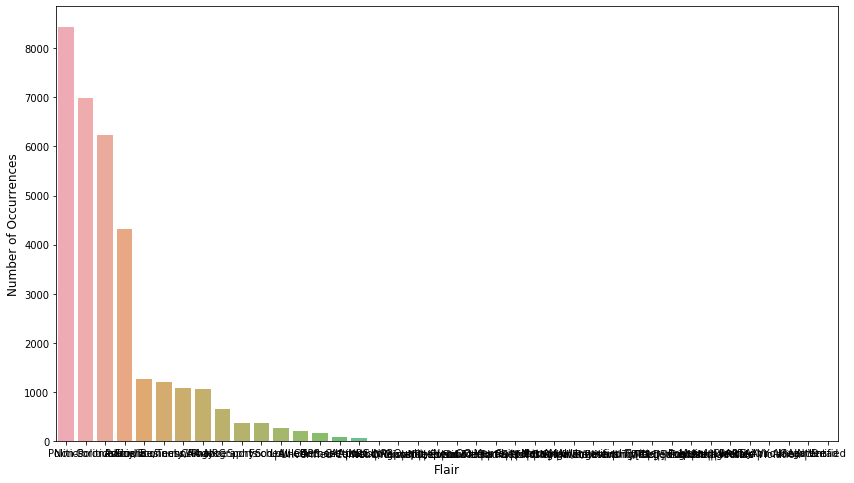

In [9]:
# Plotting no. of samples of each flair.
import seaborn as sns
cnt_srs = data['Flair'].value_counts()

plt.figure(figsize=(14,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Flair', fontsize=12)
plt.show()

We observer that out of 40, only 8 flairs __Politics, Non-Political, Coronavirus, AskIndia, Policy/Economy, Science/Technology, Business/Finance, CAA-NRC__ have a significant number of samples (>1000).

In [10]:
# Dropping the flairs with number of samples (<1000)

data = data[data.Flair != 'Scheduled']
data = data[data.Flair != 'All CAPS.']
data = data[data.Flair != 'Low-effort self-post.']
data = data[data.Flair != 'Demonetization']
data = data[data.Flair != 'CAA-NRC-NPR']
data = data[data.Flair != '| Unverified Content / Disreputed Source |']
data = data[data.Flair != '| Repost |']
data = data[data.Flair != '| Not specific to India |']
data = data[data.Flair != '| Social Media Rules |']
data = data[data.Flair != 'Low Quality/Non OC Meme']
data = data[data.Flair != '| Not Original/Relevant Title |']
data = data[data.Flair != '| Low-effort Self Post |']
data = data[data.Flair != 'Shitpost']
data = data[data.Flair != 'Meta.']
data = data[data.Flair != 'AMA']
data = data[data.Flair != 'Personal/Unverified Twitter.']
data = data[data.Flair != '| Not in English |']
data = data[data.Flair != 'Meta']
data = data[data.Flair != '| [OLD] Content |']
data = data[data.Flair != 'Post link Directly']
data = data[data.Flair != 'PARTAYYY AGAIN :D']
data = data[data.Flair != '| Not Original/Relevant Title | | Social Media Rules |']
data = data[data.Flair != 'Unverified']
data = data[data.Flair != 'Announcement']
data = data[data.Flair != 'Megathread']
data = data[data.Flair != 'Verified']
data = data[data.Flair != '| Image Rule Violation |']
data = data[data.Flair != '| Not Original/Relevant Title | | Repost |']
data = data[data.Flair != '| Witch-hunting/Targeting User | Meta.']
data = data[data.Flair != 'Food']
data = data[data.Flair != 'Sports']
data = data[data.Flair != 'Photography']

Replacing __nan, [removed] and [deleted]__ cells with __" "__

In [11]:
data['Selftext']=data['Selftext'].fillna(' ')
data['Selftext'].replace({'[removed]':' ','[deleted]':''},inplace=True)
data['Comments']=data['Comments'].fillna(' ')
data['Comments'].replace({'[removed]':' ','[deleted]':''},inplace=True)
data['Permalink']=data['Permalink'].fillna(' ')
data['Permalink'].replace({'[removed]':' ','[deleted]':''},inplace=True)

In [16]:
data['Selftext'].value_counts()

Combining Title and Selftext because Selftext has 24,000 samples as empty string.

In [17]:
data['Title+Selftext']=data['Title']+" "+data['Selftext']

### Cleaning of data 

Cleaning of data is an important step for NLP taska. It transforms text into a more digesible/simple form so that the algorithms can perform better.

Following text preprocessing methods are used- 

1.Removing HTML tag 

2.Expand contractions (eg. changing "can't" to "cannot") 

3.Normalizing String 

4.Remove whitespace 

5.Remove stopwords (eg. rmeove "in", "an", "the" etc.)

In [41]:
# BautifulSoup library

from bs4 import BeautifulSoup
def strip_html_tags(text):
    """remove html tags from text"""
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text(separator=" ")
    return stripped_text

In [40]:
# Expand contractions
import re

# Dictionary for saving common contracted words.
contractions = { 
"Can't":"cannot",
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have",
'/r/india/comments/':''
}

contractions_re = re.compile('(%s)' % '|'.join(contractions.keys()))
def expand_contractions(s, contractions_dict=contractions):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, s)

In [31]:
import unicodedata
import re

def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )
def normalizeString(s):
    s = unicodeToAscii(s.lower().strip())
    s = re.sub(r"([.!?])", r" \1", s)
    s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    return s

In [46]:
def remove_whitespace(text):
    """remove extra whitespaces from text"""
    text = text.strip()
    return " ".join(text.split())

In [47]:
def string_form(value):
    return str(value)

In [55]:
# make sure you have nltk installed
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def stop_words(text):
    stop_words = set(stopwords.words('english'))
    # tokens of words  
    word_tokens = word_tokenize(text) #converts string into list of tokens(words)

    filtered_sentence = [] 

    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 

            
    return " ".join(filtered_sentence) #joining the list of tokens to form string

In [57]:
def text_preprocessing(text):
    
    text = strip_html_tags(text)
    text = expand_contractions(text)
    text = remove_whitespace(text)
    text=normalizeString(text)
    text = text.lower()
    text=stop_words(text)
    text=string_form(text)
    
    return text

Applying the above text_preprocessing to __Title__,__Comments__,__Permalink__

In [58]:
data['Title'] = [text_preprocessing(i) for i in data['Title']]
data['Comments']=[text_preprocessing(j) for j in data['Comments']]
data['Permalink']=[text_preprocessing(k) for k in data['Permalink']]

C:\Users\Manya\Anaconda3\lib\site-packages\bs4\__init__.py:294: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\Users\Manya\Anaconda3\lib\site-packages\bs4\__init__.py:294: UserWarning: "b'...'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\Users\Manya\Anaconda3\lib\site-packages\bs4\__init__.py:357: UserWarning: "https://1000successfulentrepreneursstories.blogspot.com/2020/01/flipkart-founders-sachin-bansal-and.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Users\Manya\Anaconda3\lib\site-packages\bs4\__init__.py:357: UserWarning: "https://www.sudhavani.com/2020/01/

In [67]:
# Example of how the data looks after preprocessing
data.iloc[:4]

,Unnamed: 0,Post ID,Title,Url,Author,Score,Publish Date,Total No. of Comments,Permalink,Flair,Over 18,Selftext,Comments,Title+Selftext
0,0,elgc14,stay neutral issues varun dhawan jnu attack,https://wap.business-standard.com/article/pti-...,gochi_ji,1,2020-01-07 19:28:43,1,elgc cant stay neutral issues varun dhawan,Politics,False,,,Can't stay neutral on such issues: Varun Dhawa...
4,4,elgm4z,happened two women displayed anti caa banner a...,https://twitter.com/charmyh/status/12146125320...,IAmMohit,1,2020-01-07 19:48:43,14,elgm z happened two women displayed anticaa,Politics,False,,goonda raj . . . . gujarat model debelopment ....,What happened when two women displayed an anti...
7,7,elgp8f,jnu violence delhi police admit saw mob attack...,https://www.reddit.com/r/india/comments/elgp8f...,desigooner,1,2020-01-07 19:54:39,0,elgp f jnu violence delhi police admit saw mob,Politics,False,,,JNU violence: Delhi Police admit they saw mob ...
8,8,elgqqj,indian institute science solidarity jnu jan . ...,https://youtu.be/wJDtNR35KDc,weirwoods_burn,1,2020-01-07 19:57:32,8,elgqqj indian institute science solidarity,Politics,False,,mainstream media showing people still thinking...,The Indian Institute of Science in Solidarity ...


In [70]:
# Saving the preprocessed data for further use.
data.to_csv('data_preprocessed.csv')